In [39]:
import gradient_descent as gd
import os 
import imageio
import skimage.transform as imgxf
import urllib

def save_file(url, folder="", fileName=None):
    op = urllib.request.URLopener()
    if (fileName is None):
        purl = urllib.parse.urlparse(url)
        path = purl.path.split('/')
        fileName = path[len(path) - 1]
    
    fpath = fileName if folder=="" else folder + '/' + fileName 
    print("Saving to {}".format(fpath))
    op.retrieve(url, fpath)
    

def save_files_from_url(urlfile, folder, fromline=0, toline=0):
    f = open(urlfile, "r")
    line = 0
    for url in f:
        if (line < fromline):
            line += 1
            continue
        elif (toline != 0 and line == toline):
            break;
        
        save_file(url[:-1], folder)    # trim new line character
        line += 1
        
    
def load_image(img_path, width, height):
    img = np.array(imageio.imread(img_path))
    return imgxf.resize(img, (width, height), mode='reflect').reshape((1, width*height*3)).T, img
    

def load_images_in_folder(folder, width, height):
    flist = np.array([[f] for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]).T
    img_X = np.zeros((width*height*3, flist.shape[1]))
    it = np.nditer(flist, flags=['f_index'])
    while not it.finished:
        print("Loading : ", it[0])
        fpath = os.path.join(folder, str(it[0]))
        x, img = load_image(fpath, width, height)
        img_X[:, it.index] = x[:,0]
        it.iternext()
    
    return flist, img_X
    

def load_images_from_url(urlfile, width, height, count=1):    
    f = open(urlfile, "r")
    flist = []
    img_X = np.zeros((width*height*3, count))
    for url in f:
        if (--count < 0):
            break
        
        print("Loading : ", url)
        x, img = load_image(url, width, height)
        img_X[:, count] = x[:, 0]
        flist.append(url)
        
    return flist, img_X


def unpickle(file_path):
    import pickle
    with open(file_path, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


def load_pickle_image(file_path):
    dict = unpickle(file_path)
    data = dict[b"data"]
    labels = dict[b"labels"]
    return data, labels
    

def list_to_matrix(labels, classes):
    Y = np.zeros((classes, len(labels)))
    n = 0
    for c in labels:
        Y[c,n] = 1
        n += 1
    
    return Y

Cost after iteration 0: 69.32420034712436
In layer(1): [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 5.06110416]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 5.074017  ]
 [ 5.05714683]
 [ 0.        ]
 [ 0.        ]
 [ 5.08521354]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 5.08122207]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 5.05235444]
 [ 5.06521651]
 [ 0.        ]
 [ 0.        ]
 [ 5.07096714]
 [ 0.        ]
 [ 0.        ]
 [ 5.07848803]
 [ 0.        ]
 [ 5.08326916]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 5.09377266]
 [ 0.        ]
 [ 5.08350201]
 [ 0.        ]
 [ 0.        ]
 [ 5.07970795]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 5.08025299]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]


/Users/abarelk/Dev/Darjeeling/gradient_descent.py:8: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-Z))
/Users/abarelk/Dev/Darjeeling/gradient_descent.py:36: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = np.sum((np.dot(Y, np.nan_to_num(np.log(Yh).T)) + np.dot((1. - Y), np.nan_to_num(np.log(1. - Yh).T))))/-m


'\nx, img = load_image("data/images/2074431221_e062a9a16d.jpg", width, height)\n#save_file("http://static.flickr.com/2221/2074431221_e062a9a16d.jpg")\n\nplt.imshow(x.reshape(width, height, 3))\n'

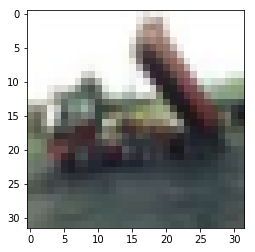

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as skprep

%matplotlib inline
width = 64
height = 64

data, labels = load_pickle_image("data/cifar-10/data_batch_1")

X = skprep.normalize(data.T, norm="l2", axis=0)
Y = list_to_matrix(labels, 10)

training_set = range(0, 1)
dev_set = range(8000, 9000)
test_set = range(9000, 10000)

training_X = X[:, training_set]
training_Y = Y[:, training_set]
dev_X = X[:, dev_set]
dev_Y = Y[:, dev_set]
test_X = X[:, test_set]
test_Y = Y[:, test_set]


hyper_params = {}
hyper_params["layer_dims"] = [3072, 512, 256, 128, 64, 32, 16, 10]
hyper_params["epochs"] = 1
hyper_params["learning_rate"] = 0.1
hyper_params["l2lambda"] = 0.3

parameters, cost = gd.gradient_descent(training_X, training_Y, hyper_params, debug_print_iter=1)


A = training_X
m = training_X.shape[1]

L = len(parameters) // 2 + 1

for l in range(1, L):       
    Ap = A
    Z, A = gd.step_forward(parameters['W' + str(l)], 
                        parameters['b' + str(l)], 
                        Ap, 
                        gd.sigmoid if l == L - 1 else gd.relu)
    print("In layer({}): {}".format(l, A))

    
cost = gd.compute_cost(Yh, training_Y, parameters, 0)
print(cost)

print(data.shape)
new_data = np.transpose(np.reshape(data[2], (32, 32, 3), order='F'), (1, 0, 2))
print(new_data.shape)
plt.imshow(new_data)


"""
x, img = load_image("data/images/2074431221_e062a9a16d.jpg", width, height)
#save_file("http://static.flickr.com/2221/2074431221_e062a9a16d.jpg")

plt.imshow(x.reshape(width, height, 3))
"""



In [92]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
a = np.array([[1, 2], [3, 4]])

import sklearn.preprocessing as skprep
print(skprep.normalize(a, norm='l2', axis=0))
mean = np.mean(a)
print(a/ np.sqrt(np.sum(np.square(a))))

print(a/np.sqrt(np.sum(np.square(a), axis=1, keepdims=True)))

print(c)
print(np.transpose(c, (1, 0, 2)))
print(c[1][0][0])

x = [1, 2, 3, 3]
print(max(x), len(x))
print(list_to_matrix(x))

[[ 0.31622777  0.4472136 ]
 [ 0.9486833   0.89442719]]
[[ 0.18257419  0.36514837]
 [ 0.54772256  0.73029674]]
[[ 0.4472136   0.89442719]
 [ 0.6         0.8       ]]
[[[ 1  7]
  [ 4 10]]

 [[ 2  8]
  [ 5 11]]

 [[ 3  9]
  [ 6 12]]]
[[[ 1  7]
  [ 2  8]
  [ 3  9]]

 [[ 4 10]
  [ 5 11]
  [ 6 12]]]
2
3 4


TypeError: list_to_matrix() missing 1 required positional argument: 'classes'